In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_auc_score, classification_report, plot_roc_curve, precision_score
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

In [2]:
#load data
data=pd.read_csv("mortgage_final_data.csv")

In [3]:
#define independent and dependent variables
y=data["status_time"].values
x=data.drop(["status_time","id"], axis=1).values

In [4]:
#print distribution of dependent variable
print("default:", len(data[data["status_time"]==1]))
print("pay off:", len(data[data["status_time"]==2]))

default: 15151
pay off: 26578


In [5]:
#split train and test set
train_x, test_x, train_y, test_y=train_test_split(x, y, train_size=0.8,random_state=7)

In [6]:
#display the number of train set
print("default before SMOTE:", len(train_y[train_y==1]))
print("pay off before SMOTE:", len(train_y[train_y==2]))

default before SMOTE: 12143
pay off before SMOTE: 21240


In [7]:
#use SMOTE to deal with imbalanced data
SM=SMOTE(random_state=0)
S_train_x, S_train_y=SM.fit_sample(train_x, train_y)

In [8]:
#display the number of training set after SMOTE
print("default after SMOTE:", len(S_train_y[S_train_y==1]))
print("pay off after SMOTE:", len(S_train_y[S_train_y==2]))

default after SMOTE: 21240
pay off after SMOTE: 21240


In [9]:
#Train the model
model=LGBMClassifier(n_estimators=100,metric="auc")
model.fit(S_train_x,S_train_y,eval_set=[(test_x, test_y)])

[1]	valid_0's auc: 0.832253
[2]	valid_0's auc: 0.837857
[3]	valid_0's auc: 0.839009
[4]	valid_0's auc: 0.84294
[5]	valid_0's auc: 0.843956
[6]	valid_0's auc: 0.844655
[7]	valid_0's auc: 0.8465
[8]	valid_0's auc: 0.847802
[9]	valid_0's auc: 0.848777
[10]	valid_0's auc: 0.85019
[11]	valid_0's auc: 0.850709
[12]	valid_0's auc: 0.851589
[13]	valid_0's auc: 0.852387
[14]	valid_0's auc: 0.852967
[15]	valid_0's auc: 0.853969
[16]	valid_0's auc: 0.85437
[17]	valid_0's auc: 0.854981
[18]	valid_0's auc: 0.855398
[19]	valid_0's auc: 0.855661
[20]	valid_0's auc: 0.855743
[21]	valid_0's auc: 0.856118
[22]	valid_0's auc: 0.85628
[23]	valid_0's auc: 0.857025
[24]	valid_0's auc: 0.857304
[25]	valid_0's auc: 0.857955
[26]	valid_0's auc: 0.858273
[27]	valid_0's auc: 0.858526
[28]	valid_0's auc: 0.858832
[29]	valid_0's auc: 0.859266
[30]	valid_0's auc: 0.859626
[31]	valid_0's auc: 0.859995
[32]	valid_0's auc: 0.860207
[33]	valid_0's auc: 0.860607
[34]	valid_0's auc: 0.860797
[35]	valid_0's auc: 0.861279


LGBMClassifier(metric='auc')

In [10]:
#Calculate the confusion matrix
y_pred = model.predict(test_x)
cm=confusion_matrix(test_y,y_pred)
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.72      0.73      3008
           2       0.85      0.85      0.85      5338

    accuracy                           0.81      8346
   macro avg       0.79      0.79      0.79      8346
weighted avg       0.81      0.81      0.81      8346



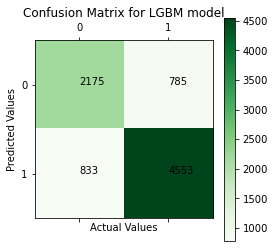

In [11]:
#Visualize the confusion matrix
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
plt.annotate(cm[0,1],xy=(0,1))
plt.annotate(cm[1,1],xy=(1,1))
plt.annotate(cm[0,0],xy=(0,0))
plt.annotate(cm[1,0],xy=(1,0))
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.title("Confusion Matrix for LGBM model")
plt.show()

In [12]:
#Find the average accuracy of K-Fold Validation(K=5)
cross_val_score(model, S_train_x, S_train_y, cv=5, scoring="accuracy").mean()

0.8317325800376647

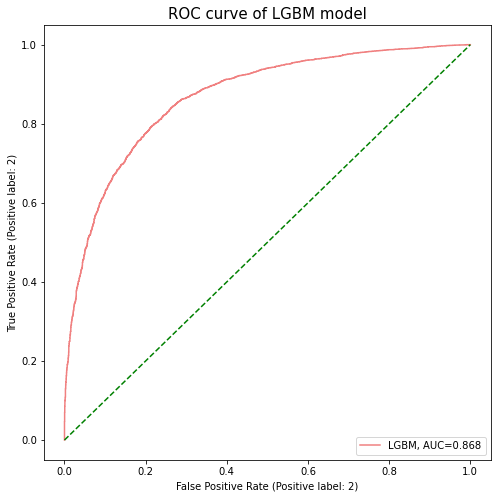

In [13]:
#Draw the ROC curve and calculate the AUC.
fig, ax=plt.subplots(figsize=(8,8))
plot_roc_curve(model, test_x, test_y, ax=ax, label="LGBM, AUC=0.868",color="lightcoral")
plt.title("ROC curve of LGBM model",fontsize=15)
plt.plot([0,1],[0,1],"g--")
plt.show()